In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from deepface import DeepFace
import os
import random
import pandas as pd
import glob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

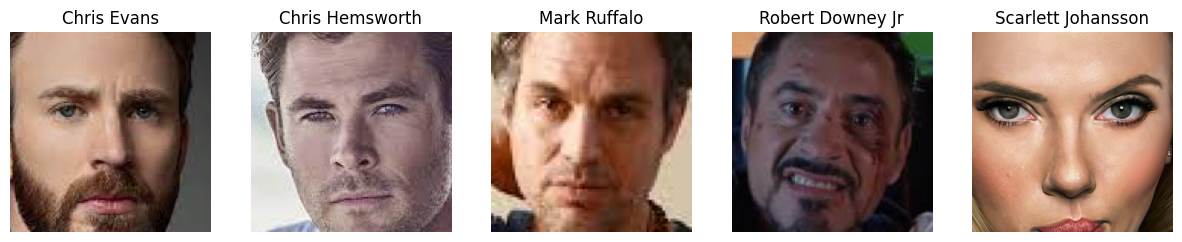

In [2]:
database_dir =  "Data/Images/Database Images"
class_names = ["Chris Evans", "Chris Hemsworth", "Mark Ruffalo", "Robert Downey Jr", "Scarlett Johansson"]
images = []

for class_name in class_names:
    image_files = os.listdir(os.path.join(database_dir, class_name))
    image_file = random.choice(image_files) 
    images.append(os.path.join(database_dir, class_name, image_file))

fig, ax = plt.subplots(1, 5, figsize = (15, 4))

for i in range(5):
    ax[i].imshow(plt.imread(images[i]))
    ax[i].set(title = class_names[i])
    ax[i].axis('off');

In [3]:
def get_label(image_path):  
    actor_names = ['chris_evans', 'chris_hemsworth', 'mark_ruffalo', 'robert_downey_jr', 'scarlett_johansson']
    
    for actor_name in actor_names:
        if actor_name in image_path:
            return actor_names.index(actor_name)
        else:
          continue

In [4]:
def face_recognition(image_path):
    true_label = get_label(image_path)
    result = DeepFace.find(img_path = image_path,
                            db_path = 'Data/Images/Database Images',
                            model_name = 'ArcFace',
                            distance_metric = 'euclidean_l2',
                            enforce_detection = False)
    
    pred_file_path = result[0]['identity'][0]
    
    pred_label = get_label(pred_file_path)

    recognition = true_label == pred_label
    
    return {'Recognition': recognition, 'True Label': true_label, 'Pred Label': pred_label}

25-07-17 22:52:37 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:05 - find function lasts 28.448011875152588 seconds
25-07-17 22:53:06 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:06 - find function lasts 0.588423490524292 seconds
25-07-17 22:53:06 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:07 - find function lasts 0.6616272926330566 seconds
25-07-17 22:53:07 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:07 - find function lasts 0.4475669860839844 seconds
25-07-17 22:53:07 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:08 - find function lasts 0.45990967750549316 seconds


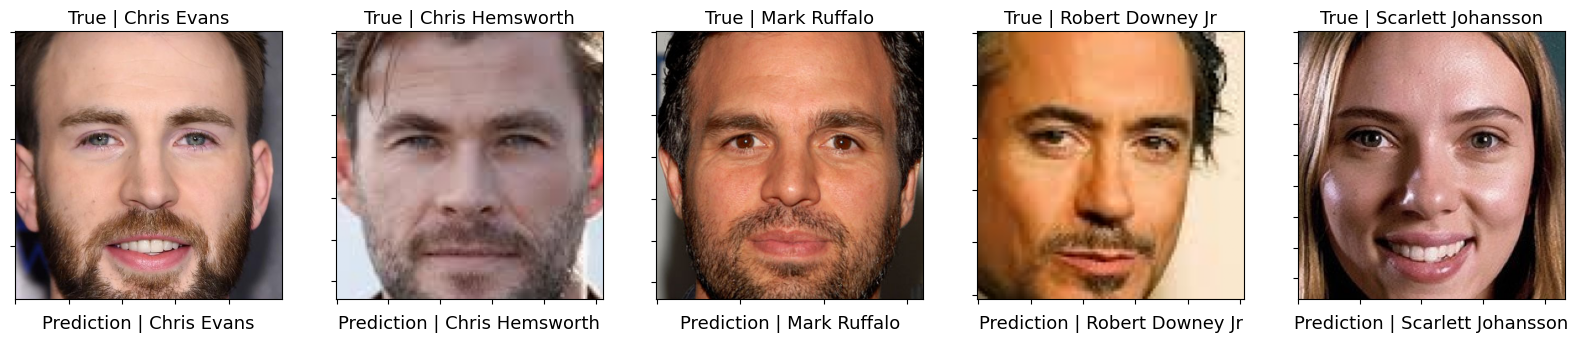

In [5]:
test_image_dir = 'Data/Images/Test Images'

image_paths = []

for actor_dir in class_names:

    actor_path = os.path.join(test_image_dir, actor_dir)

    image_file = random.choice(os.listdir(actor_path))

    image_path = os.path.join(actor_path, image_file)

    image_paths.append(image_path)

fig, axes = plt.subplots(ncols = 5, figsize = (20, 4))

for i, image_path in enumerate(image_paths):

    recognition_result = face_recognition(image_path)
    true_label = class_names[recognition_result['True Label']]
    pred_label = class_names[recognition_result['Pred Label']] 
    
    axes[i].imshow(plt.imread(image_path))  
    axes[i].set_title(f'True | {true_label}', fontsize = 13)
    axes[i].set_xlabel(f'Prediction | {pred_label}', fontsize = 13)
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([]);

In [6]:
true_labels = []
pred_labels = []

for actor_dir in os.listdir(test_image_dir):

    actor_path = os.path.join(test_image_dir, actor_dir)
    
    for image_path in glob.glob(os.path.join(actor_path, '*')):
        true_label = get_label(image_path)
        true_labels.append(true_label)

        recognition_result = face_recognition(image_path)
        
        pred_label = recognition_result['Pred Label']
        pred_labels.append(pred_label)

25-07-17 22:53:10 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:10 - find function lasts 0.49385619163513184 seconds
25-07-17 22:53:10 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:11 - find function lasts 0.4643676280975342 seconds
25-07-17 22:53:11 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:12 - find function lasts 0.6428933143615723 seconds
25-07-17 22:53:12 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:12 - find function lasts 0.5103447437286377 seconds
25-07-17 22:53:12 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:13 - find function lasts 0.5398077964782715 seconds
25-07-17 22:53:13 - There are 224 representations found in representations_arcface.pkl
25-07-17 22:53:13 - find function lasts 0.5353248119354248 seconds
25-07-17 22:53:13 - There are 224 representations found in representations_

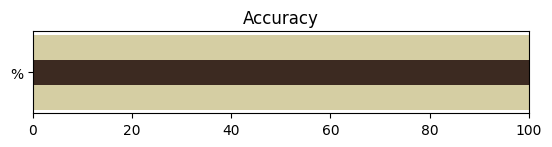

In [7]:
accuracy = accuracy_score(true_labels, pred_labels) * 100

fig, ax = plt.subplots()

ax.barh([1], 100, left = 0, height = 15, color="#D5CEA3")

ax.barh([1], accuracy, color="#3C2A21", height = 5);

ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels('%')
ax.set_xlim(0, 100)
ax.set(title = 'Accuracy');

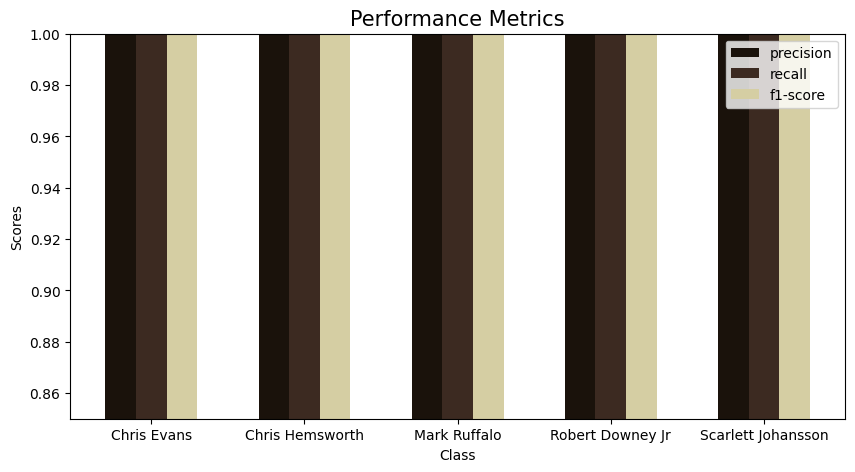

In [8]:
report = classification_report(true_labels, pred_labels, output_dict = True)

metrics = ["precision", "recall", "f1-score"]

class_scores = []

for i in range(5):
    
    class_scores.append([report[str(i)][metric] for metric in metrics])
 
fig, ax = plt.subplots(figsize = (10, 5))

bar_width = 0.2

for i, scores in enumerate(class_scores):
    ax.bar(i - bar_width, scores[0], bar_width, color = "#1A120B")
    ax.bar(i, scores[1], bar_width, color = "#3C2A21")
    ax.bar(i + bar_width, scores[2], bar_width, color = "#D5CEA3")

ax.set_xlabel("Class")
ax.set_ylabel("Scores")
ax.set_ylim(0.85, 1)
ax.legend(metrics)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(class_names)
ax.set_title("Performance Metrics", fontsize = 15);

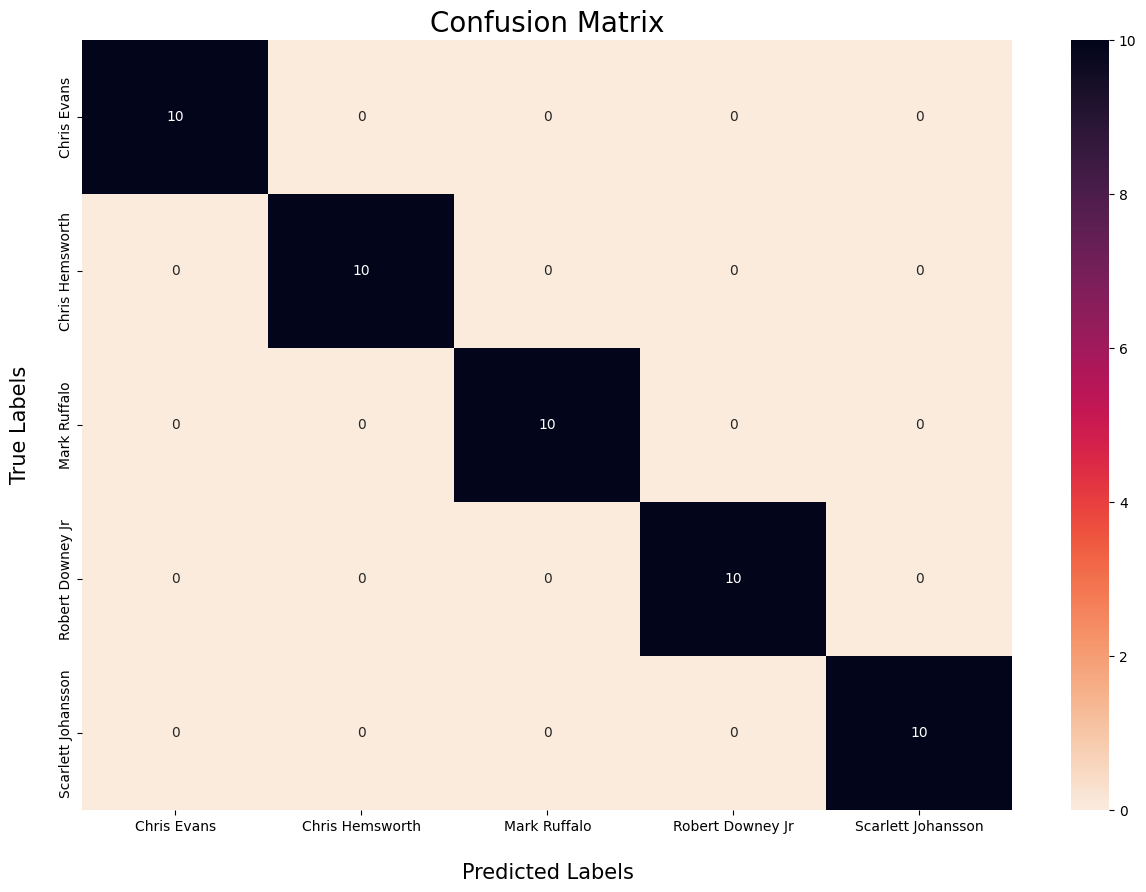

In [9]:
cm = tf.math.confusion_matrix(true_labels, pred_labels)

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(cm, annot=True, fmt='', ax = ax, cmap = 'rocket_r')

ax.set_yticklabels(class_names, va="center")
ax.set_xticklabels(class_names, ha="center")
ax.set_xlabel('\nPredicted Labels', fontsize = 15)
ax.set_ylabel('True Labels\n', fontsize = 15)

plt.title("Confusion Matrix", fontsize = 20);